In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('df1.xlsx', sheet_name='Sheet1')
print(df.tail(10))

     Index     peso  comprimento_Total  comprimento_Padrao  \
463    NaN  1013.74               36.0                30.3   
464    NaN   795.64               34.5                28.3   
465    NaN   911.28               35.5                29.8   
466    NaN   898.40               36.0                30.2   
467    NaN   810.48               34.5                28.6   
468    NaN   822.67               36.0                30.6   
469    NaN   653.60               32.0                26.7   
470    NaN   905.54               35.2                28.8   
471    NaN   754.89               33.3                29.4   
472    NaN   756.22               33.3                28.2   

     comprimento_Cabeça  altura  espessura  Cluster  
463                 9.8    11.6        3.5        1  
464                 9.2    10.8        3.2        1  
465                 8.2    10.8        3.1        1  
466                 9.5    10.7        3.0        1  
467                 9.5    10.2        3.1     

In [3]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [4]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df,  target = 'peso', train_size=0.8)
best_model = exp2.compare_models()

,Description,Value
0,Session id,477
1,Target,peso
2,Target type,Regression
3,Original data shape,"(473, 8)"
4,Transformed data shape,"(473, 7)"
5,Transformed train set shape,"(378, 7)"
6,Transformed test set shape,"(95, 7)"
7,Numeric features,7
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,33.5027,2355.4787,47.7236,0.9492,0.0919,0.0663,0.0420
lightgbm,Light Gradient Boosting Machine,34.6917,2517.7080,49.4049,0.9460,0.0933,0.0687,0.1080
gbr,Gradient Boosting Regressor,34.6486,2559.1474,49.6208,0.9452,0.0922,0.0674,0.0260
rf,Random Forest Regressor,34.5723,2545.3883,49.3193,0.9452,0.0941,0.0683,0.0570
knn,K Neighbors Regressor,35.4286,2618.9140,50.2993,0.9438,0.0958,0.0710,0.0110
lasso,Lasso Regression,36.5614,2671.8502,50.5234,0.9425,0.1085,0.0773,0.0110
llar,Lasso Least Angle Regression,36.5656,2671.4100,50.5201,0.9425,0.1085,0.0773,0.0090
huber,Huber Regressor,35.9868,2691.8565,50.6768,0.9423,0.1067,0.0750,0.0110
ridge,Ridge Regression,36.6251,2694.2464,50.7843,0.9422,0.1106,0.0776,0.0100
br,Bayesian Ridge,36.6196,2690.0581,50.7425,0.9422,0.1102,0.0776,0.0100


In [ ]:
rf = exp2.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5374,52.6590,7.2566,0.9875,0.0544,0.0450
1,6.7926,133.0081,11.5329,0.9723,0.0676,0.0510
2,4.9543,47.8690,6.9187,0.9871,0.0591,0.0473
3,4.8732,45.7695,6.7653,0.9887,0.0580,0.0476
4,6.6781,96.5672,9.8269,0.9762,0.0643,0.0526
5,6.4388,90.3546,9.5055,0.9835,0.0596,0.0498
6,4.6513,61.5881,7.8478,0.9875,0.0570,0.0419
7,5.1347,53.3062,7.3011,0.9898,0.0554,0.0451
8,5.9676,62.6878,7.9176,0.9867,0.0555,0.0442


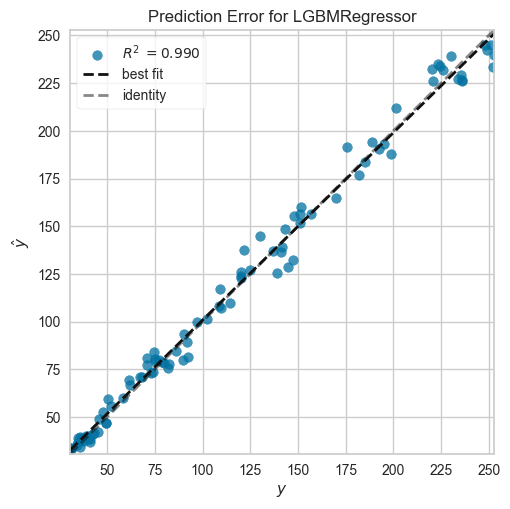

In [15]:
exp2.plot_model(rf, plot = 'error')

In [16]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,5.2785,46.6982,6.8336,0.9903,0.0620,0.0518


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
368,19.200001,16.799999,5.4,6.9,175.779999,191.283547
176,15.700000,13.500000,3.8,5.0,92.300003,81.448375
453,22.500000,19.200001,5.5,6.9,230.000000,239.143234
129,14.200000,12.200000,3.8,4.5,58.330002,59.717117
16,13.000000,11.200000,3.6,3.8,40.080002,38.324127
388,19.299999,16.200001,5.5,5.8,151.100006,156.238324
372,21.500000,18.500000,6.0,7.0,233.639999,227.303200
376,20.500000,17.400000,5.8,6.4,192.710007,190.293410
317,18.700001,16.200001,5.3,5.4,147.250000,132.203743
78,12.000000,10.300000,2.9,3.4,31.200001,33.350046


In [18]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
112,13.200000,11.0,3.2,3.9,39.990002,39.995006
125,15.000000,13.2,4.4,4.9,73.129997,73.011789
464,19.299999,16.6,5.0,5.5,130.100006,144.821246
116,12.400000,10.6,3.3,3.8,34.779999,37.098870
220,15.300000,13.0,4.2,4.6,73.820000,73.474623


# Salvando do Modelo

In [ ]:
### Saving model 
#save_model(rf, 'gbr_df1') 


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['comprimento_Total',
                                              'comprimento_Padrao',
                                              'comprimento_Cabeça', 'altura'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=5367))]),
 'gbr_df1.pkl')

In [ ]:
################### LOADING MODEL
#saved_rf = load_model('gbr_df1') 

#saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeça', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=5367))])

In [ ]:
#exp2.predict_model(saved_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,5.6052,55.5924,7.4560,0.9885,0.0619,0.0510


,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
112,13.200000,11.000000,3.2,3.9,39.990002,40.908499
125,15.000000,13.200000,4.4,4.9,73.129997,72.035001
464,19.299999,16.600000,5.0,5.5,130.100006,142.677598
116,12.400000,10.600000,3.3,3.8,34.779999,36.227701
220,15.300000,13.000000,4.2,4.6,73.820000,73.277999
...,...,...,...,...,...,...
388,19.299999,16.200001,5.5,5.8,151.100006,153.292799
372,21.500000,18.500000,6.0,7.0,233.639999,227.780702
376,20.500000,17.400000,5.8,6.4,192.710007,191.004897
317,18.700001,16.200001,5.3,5.4,147.250000,127.993100


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)